# **Parte 1 - CrabAgePrediction_Subset2**

# **Comentarios**

## Análisis Exploratorio de Datos
Deben visualizar la relación entre las diferentes características y la variable objetivo ("Age"). Además, deben verificar la correlación entre las características y la variable objetivo.

**Comentarios**

Análisis exhaustivo y sólido, incluyendo la categoría 'I' en la variable 'Sex'. Sin embargo, no ofrecen una justificación clara sobre por qué optaron por incluir esta categoría en su análisis.

**Puntos o totales: 9/10**

## Construcción del Modelo:
Deben construir un modelo de regresión, que puede ser lineal múltiple o polinomial, para predecir la edad del cangrejo. Deben evaluar el modelo utilizando métricas como RMSE y MAE.


**Comentarios**

#### **Selección de Características**

Las características seleccionadas son coherentes con las discutidas en el análisis previo, y los argumentos presentados para su elección son sólidos y bien fundamentados

#### **Validación**
Realizan una división de los datos en un conjunto de validación y presentan métricas representativas.

Aunque incluyen la metrica de R cuadrado en su análisis, no abordan el hecho de que solo el 40% de la variabilidad en los datos es explicada por su modelo. Optan por un modelo polinomial de segundo grado, pero con un conjunto más reducido de características, buen enfoque


**Puntos o totales: 23/25**


##Entrenamiento Final y Evaluación:


**Puntos o totales: 14/15**


En el inicio de nuestro análisis, importamos las bibliotecas esenciales para llevar a cabo nuestro estudio. Esto nos permitirá utilizar las herramientas necesarias para procesar y analizar los datos de manera efectiva.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

import pickle

## **1.Análisis exploratorio de los datos.**

En esta etapa inicial de nuestro análisis, comenzamos explorando los datos para obtener una comprensión inicial de su estructura y contenido. Utilizamos las siguientes dos funciones clave:

1. **datos.head()**: Esta función nos proporciona una vista previa de las primeras filas de nuestro conjunto de datos. Nos permite echar un vistazo rápido a las primeras observaciones y las columnas disponibles, lo que es útil para entender cómo se ven los datos.

2. **datos.info()**: Con esta función, obtenemos información esencial sobre el conjunto de datos, como el número de registros, el tipo de datos de cada columna y si hay valores nulos. Esto es fundamental para evaluar la calidad de nuestros datos y determinar si se requiere algún preprocesamiento.

Estos pasos iniciales nos ayudan a familiarizarnos con los datos y a identificar cualquier problema potencial que necesite ser abordado antes de continuar con nuestro análisis.

In [ ]:
datos = pd.read_csv('CrabAgePrediction_Subset1.csv')

In [ ]:
datos.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,M,1.6250,1.3000,0.4375,35.876292,17.434942,7.866986,9.525432,9
1,F,1.4875,1.0750,0.5250,43.218813,18.512224,11.226402,11.623295,11
2,F,1.3875,1.1125,0.4375,32.502702,15.620575,6.917278,7.895336,8
3,I,0.9875,0.7500,0.3000,8.490675,3.586212,1.927766,2.537280,8
4,I,0.9375,0.7250,0.3500,8.504850,3.968930,1.771844,2.338834,8


Hemos obtenido información clave sobre nuestro conjunto de datos:

- Tenemos un total de 1946 registros en nuestro conjunto de datos, numerados desde 0 hasta 1945, lo que nos indica que tenemos 1946 observaciones en nuestros datos.

- El conjunto de datos consta de 9 columnas en total, cada una con su nombre y características específicas:

   1. **Sex**: Esta columna contiene información sobre el género del cangrejo y es de tipo "object", lo que sugiere que contiene valores de texto o categorías.

   2. **Length**: Esta columna registra la longitud del cangrejo y es de tipo "float64", lo que indica que contiene valores decimales.

   3. **Diameter**: Similar a la columna de longitud, esta columna mide el diámetro del cangrejo y también es de tipo "float64".

   4. **Height**: Registra la altura del cangrejo y es de tipo "float64".

   5. **Weight**: Contiene información sobre el peso del cangrejo y es de tipo "float64".

   6. **Shucked Weight**: Mide el peso de la carne del cangrejo extraída y es de tipo "float64".

   7. **Viscera Weight**: Esta columna representa el peso de las vísceras del cangrejo y es de tipo "float64".

   8. **Shell Weight**: Indica el peso de la concha del cangrejo y es de tipo "float64".

   9. **Age**: Esta columna registra la edad del cangrejo y es de tipo "int64", lo que sugiere que contiene valores enteros.

Estos detalles iniciales son fundamentales para comprender la estructura de nuestro conjunto de datos y para decidir cómo proceder con nuestro análisis y la construcción de modelos predictivos de edad de cangrejos.

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             1946 non-null   object 
 1   Length          1946 non-null   float64
 2   Diameter        1946 non-null   float64
 3   Height          1946 non-null   float64
 4   Weight          1946 non-null   float64
 5   Shucked Weight  1946 non-null   float64
 6   Viscera Weight  1946 non-null   float64
 7   Shell Weight    1946 non-null   float64
 8   Age             1946 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 137.0+ KB


### ¿Cuál es el panorama general del dataset?

Se pueden apreciar que hay algunas variables con datos atípicos, dígase la altura al tener un máximo de $2.825$, estando alejado de la media mucho más de 3 desviaciones estándar. No obstante, la eliminación de estos podría sesgar el modelo para que únicamente contemple cangrejos estadísticamente "normales". Así, su utilidad únicamente recaería en el análisis gráfico, donde, al no afectar la escala, se podría apreciar de una mejor manera la correlación entre variables

In [ ]:
datos.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,1.315635,1.024942,0.351497,23.811388,10.295720,5.186851,6.878738,9.941932
std,0.301336,0.249574,0.111232,13.947888,6.246936,3.096338,3.995197,3.227806
min,0.275000,0.225000,0.000000,0.226796,0.070874,0.056699,0.085048,3.000000
25%,1.137500,0.875000,0.287500,12.902566,5.404123,2.721552,3.827183,8.000000
50%,1.362500,1.062500,0.362500,23.069406,9.631743,4.918638,6.761356,9.000000
75%,1.550000,1.212500,0.412500,33.115760,14.398002,7.253928,9.482908,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,18.186204,25.429502,27.000000


In [ ]:
from scipy import stats

datos_sin_outliers = datos[(np.abs(stats.zscore(datos.drop(columns=["Sex", "Age"]))) < 3).all(axis = 1)]
datos_sin_outliers.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,1909.000000,1909.000000,1909.000000,1909.000000,1909.000000,1909.000000,1909.000000,1909.000000
mean,1.311459,1.021372,0.348828,23.316461,10.074045,5.094237,6.741122,9.910424
std,0.292998,0.243174,0.093311,13.171253,5.875267,2.961437,3.762732,3.172841
min,0.412500,0.300000,0.075000,0.595340,0.212621,0.127573,0.226796,3.000000
25%,1.137500,0.875000,0.287500,12.828149,5.386405,2.721552,3.813008,8.000000
50%,1.362500,1.062500,0.362500,22.849697,9.567956,4.890289,6.662133,9.000000
75%,1.537500,1.212500,0.412500,32.601925,14.160575,7.101550,9.326985,11.000000
max,1.937500,1.512500,0.587500,65.260549,28.547946,14.429896,18.852418,27.000000


### ¿Qué nos dicen las correlaciones de las variables con respecto a la edad?

En el gráfico de dispersión con respecto a la edad no se puede evidenciar mucha correlación.

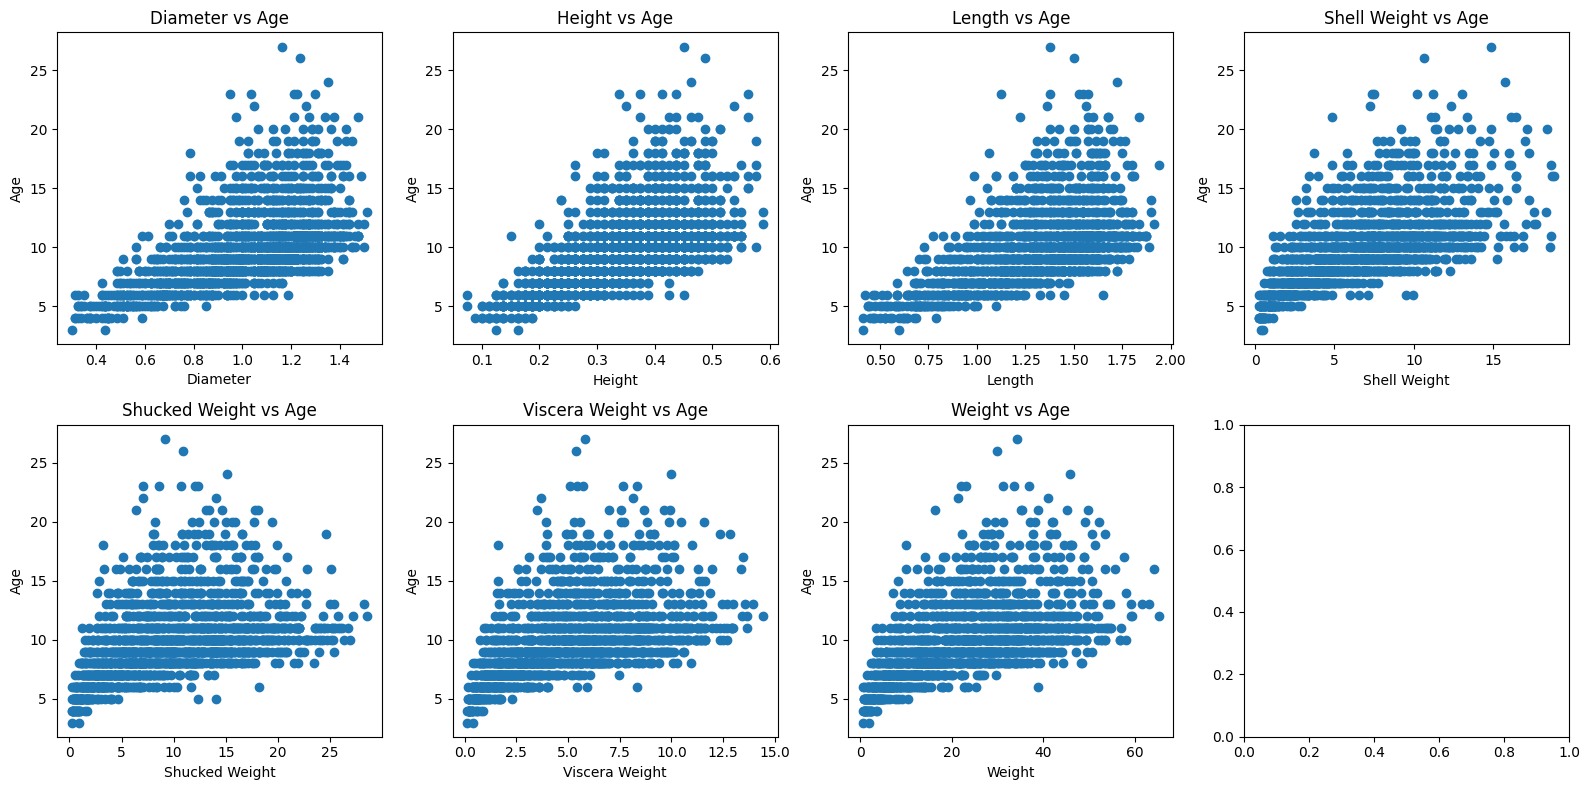

In [ ]:
columns_to_plot = datos.drop(columns=["Sex"]).columns.difference(["Age"])

n_subplots = 4

fig, axes = plt.subplots(
    2,
    n_subplots,
    figsize=(16, 8),
)
fig.subplots_adjust(hspace=0.5)
for idx, column in enumerate(columns_to_plot):
    row = idx // n_subplots
    col = idx % n_subplots

    ax = axes[row, col]
    ax.scatter(datos_sin_outliers[column], datos_sin_outliers["Age"])
    ax.set_xlabel(column)
    ax.set_ylabel("Age")
    ax.set_title(f"{column} vs Age")
    ax.autoscale()

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()


En la matriz de correlación que hemos calculado, podemos observar que no existe una correlación fuerte entre ninguna de las variables y la edad de los cangrejos. Sin embargo, existen algunas observaciones interesantes:

1. **Height y Shell Weight**: Aunque la correlación no es muy fuerte, podemos notar una correlación positiva moderada entre la altura (`Height`) y el peso de la concha (`Shell Weight`). Esto sugiere que, en general, cangrejos más altos pueden tener conchas más pesadas, pero la relación no es lo suficientemente fuerte como para ser una característica predictiva sólida de la edad.

2. **Shucked Weight**: A pesar de no ser concluyente, parece haber una correlación relativamente baja entre el peso de la carne extraída (`Shucked Weight`) y la edad de los cangrejos. Esto también podría ser un indicador débil de la edad, pero no es una relación muy robusta.

3. **Height en relación con otras variables**: Por otro lado, la variable `Height` parece tener una correlación muy baja en comparación con las otras variables, que están altamente correlacionadas entre sí. Esto sugiere que la altura no está fuertemente relacionada con las otras características físicas del cangrejo.

Aunque no hemos encontrado una correlación fuerte y clara con la edad, es importante tener en cuenta estas relaciones y considerarlas en nuestro proceso de modelado. Es posible que necesitemos utilizar múltiples características en conjunto para construir un modelo de predicción efectivo de la edad de los cangrejos.

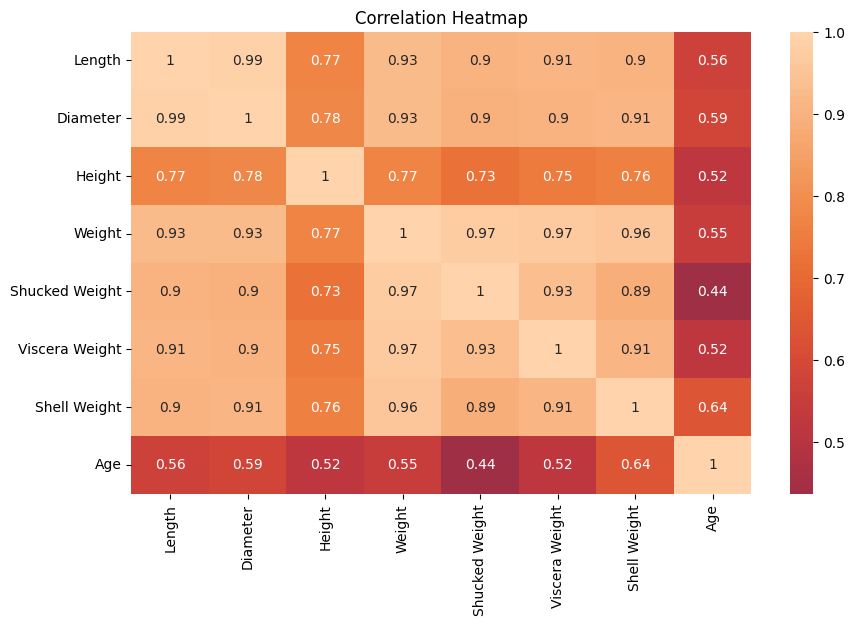

In [ ]:
correlation_matrix = datos.drop(columns=["Sex"]).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, center=0)
plt.title('Correlation Heatmap')
plt.show()

### Nivel de significancia de las variables con respecto a la edad

Finalmente, podríamos guiarnos por las variables más significativas en una regresión lineal, asumiendo que no habrá mayor diferencia al aumentar su grado (polinómica).

Usamos la librería `statsmodels`, la cual usa el método de mínimos cuadrados ordinarios para computar la regresión lineal, incluyendo el resumen del modelo como también algunas pruebas de hipótesis. Particularmente nos interesa el T-test, en donde vemos que las variables más significativas con un $\alpha = 0.05$ son `Shucked Weight`, `Shell Weight`, `Weight` y `Diameter`, respectivamente. Esto difiere con los resultados de las correlaciones, lo cual nos indicaba que la variable menos correlacionada era el `Shucked Weight` .

In [ ]:
import statsmodels.api as sm

X = datos.drop(columns=["Age","Sex"])
y = datos.Age

X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm).fit()
p_values = model.summary2().tables[1]["P>|t|"]
p_values = p_values.drop(labels=["const"])
p_values[p_values < 0.05]

Diameter          1.743106e-07
Height            3.958797e-05
Weight            1.740698e-06
Shucked Weight    3.200591e-42
Viscera Weight    9.275421e-03
Shell Weight      1.322992e-15
Name: P>|t|, dtype: float64

Así, dado que las correlaciones no son fuertemente concluyentes, los niveles de significancia obtenidos son nuestra guía para la elección de características. Por tanto, nuestras posibles características serían las combinaciones entre `Shucked Weight`, `Shell Weight`, `Diameter`, `Weight`, `Height` y `Viscera Weight`, en orden de importancia.

## **2. Construye un modelo de regresión (lineal múltiple o polinomial) para predecir la edad del cangrejo y evalúa los modelos utilizando métricas como RMSE y MAE.**

Ahora, procederemos a construir modelos de regresión que nos ayuden a predecir la edad de los cangrejos. Dependiendo de nuestras necesidades y las características de nuestros datos, hemos optado por construir un modelo de regresión polinomial. Este enfoque puede capturar relaciones no lineales entre las características físicas de los cangrejos y su edad.

In [ ]:
indices = (datos["Sex"] != "I")
columns = ["Shell Weight", "Weight", "Shucked Weight", "Diameter"]
X = datos[indices][columns]
y = datos[indices].Age
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state = 0)

Preferimos utilizar la validación cruzada en lugar de la "División de datos de entrenamiento y prueba" por las siguientes razones:

1. **Robustez en la evaluación**: La validación cruzada proporciona una evaluación más robusta del modelo al realizar múltiples divisiones de datos y promediar los resultados. Esto ayuda a mitigar la variabilidad en los datos y proporciona una medida más confiable del rendimiento del modelo.

2. **Mejor manejo de la variabilidad**: En casos en los que los datos son altamente variables o propensos al sesgo en una sola división, la validación cruzada puede contrarrestar estos problemas al evaluar el modelo en diferentes particiones de datos.

3. **Uso eficiente de los datos**: En conjuntos de datos pequeños, la validación cruzada maximiza la utilización de los datos disponibles al entrenar y evaluar el modelo en múltiples subconjuntos de datos, lo que mejora la calidad de la evaluación.

4. **Detección de sobreajuste y subajuste**: La validación cruzada permite identificar de manera más efectiva problemas de sobreajuste o subajuste al proporcionar una evaluación detallada y completa del rendimiento del modelo.

5. **Generalización confiable**: La validación cruzada proporciona una estimación más confiable del rendimiento del modelo en datos no vistos, lo que es esencial para tomar decisiones informadas sobre la aplicabilidad del modelo en situaciones del mundo real.

El beneficio adicional de la validación cruzada es que asegura que las métricas de evaluación sean completamente independientes de la división específica de los datos. Esto significa que, independientemente de la elección de un valor particular para el parámetro "random state" en el proceso de división de los datos, las métricas de rendimiento del modelo se mantienen consistentes. Por ejemplo, en un escenario donde se utiliza un valor de "random state" de 100, podríamos obtener un MSE de 0.5, mientras que con un valor de "random state" de 3 podríamos obtener un MSE de 0.3. Esto demuestra que la validación cruzada brinda una evaluación más estable y confiable, lo que es esencial para la toma de decisiones informadas sobre el modelo.

In [ ]:
from sklearn.model_selection import cross_validate, KFold

orders = range(1, 5)
MSE_Train = dict.fromkeys(orders)
MSE_Test = dict.fromkeys(orders)
RMSE_Train = dict.fromkeys(orders)
RMSE_Test = dict.fromkeys(orders)
MAE_Train = dict.fromkeys(orders)
MAE_Test = dict.fromkeys(orders)
R2_Train = dict.fromkeys(orders)
R2_Test = dict.fromkeys(orders)

for order in orders:
    print("\nPolinomio de orden", order)

    poly = PolynomialFeatures(degree=int(order))
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    folds = KFold(n_splits=10, shuffle=True, random_state=0)
    cv = cross_validate(
        model,
        X_poly,
        y,
        cv=folds,
        scoring={
            "r2": "r2",
            "mse": "neg_mean_squared_error",
            "mae": "neg_mean_absolute_error",
            "rmse": "neg_root_mean_squared_error",
        },
        return_train_score=True,
    )

    mse_train = abs(np.mean(cv["train_mse"]))
    mse_test = abs(np.mean(cv["test_mse"]))

    rmse_train = abs(np.mean(cv["train_rmse"]))
    rmse_test = abs(np.mean(cv["test_rmse"]))


    mae_train = abs(np.mean(cv["train_mae"]))
    mae_test = abs(np.mean(cv["test_mae"]))

    r2_train = np.mean(cv["train_r2"])
    r2_test = np.mean(cv["test_r2"])


    print("MSE_train =", mse_train)
    print("MSE_test =", mse_test)

    print("RMSE_train =", rmse_train)
    print("RMSE_test =", rmse_test)

    print("MAE_train =", mae_train)
    print("MAE_test =", mae_test)

    print("R^2_train =", r2_train)
    print("R^2_test =", r2_test, "\n\n---\n")

    MSE_Train[order] = mse_train
    MSE_Test[order] = mse_test
    RMSE_Train[order] = rmse_train
    RMSE_Test[order] = rmse_test
    MAE_Train[order] = mae_train
    MAE_Test[order] = mae_test
    R2_Train[order] = r2_train
    R2_Test[order] = r2_test


Polinomio de orden 1
MSE_train = 5.845593278015337
MSE_test = 5.904730330522043
RMSE_train = 2.4176758033584105
RMSE_test = 2.4231860998153594
MAE_train = 1.7747561064782311
MAE_test = 1.7838797997867162
R^2_train = 0.3942927082922127
R^2_test = 0.3797179655409386 

---


Polinomio de orden 2
MSE_train = 5.3901613200770315
MSE_test = 5.5724576478364
RMSE_train = 2.321618902619151
RMSE_test = 2.3562818466395887
MAE_train = 1.6667202600061661
MAE_test = 1.6904128765887012
R^2_train = 0.4414421095416229
R^2_test = 0.41047964798643494 

---


Polinomio de orden 3
MSE_train = 5.2622347697822685
MSE_test = 5.771895578398455
RMSE_train = 2.2938961348369875
RMSE_test = 2.3978158494954633
MAE_train = 1.6440403832630934
MAE_test = 1.7129158650845013
R^2_train = 0.45471074873761513
R^2_test = 0.3915636105507852 

---


Polinomio de orden 4
MSE_train = 5.038012144708675
MSE_test = 9.078201907954767
RMSE_train = 2.244477903747172
RMSE_test = 2.95434675659848
MAE_train = 1.6044648358888574
MAE_test

Graficamos las métricas de evaluación, que incluyen el Error Cuadrático Medio (MSE), la Raíz del Error Cuadrático Medio (RMSE), el Error Absoluto Medio (MAE) y el Coeficiente de Determinación (R^2), en relación con el orden de los modelos polinomiales. Esta representación gráfica nos proporciona una clara y comparativa visión de cómo estas métricas varían según el grado del modelo polinomial. Estas visualizaciones son cruciales para ayudarnos a determinar cuál es el orden de modelo que mejor se adapta a la tarea de predecir con precisión la edad de los cangrejos.

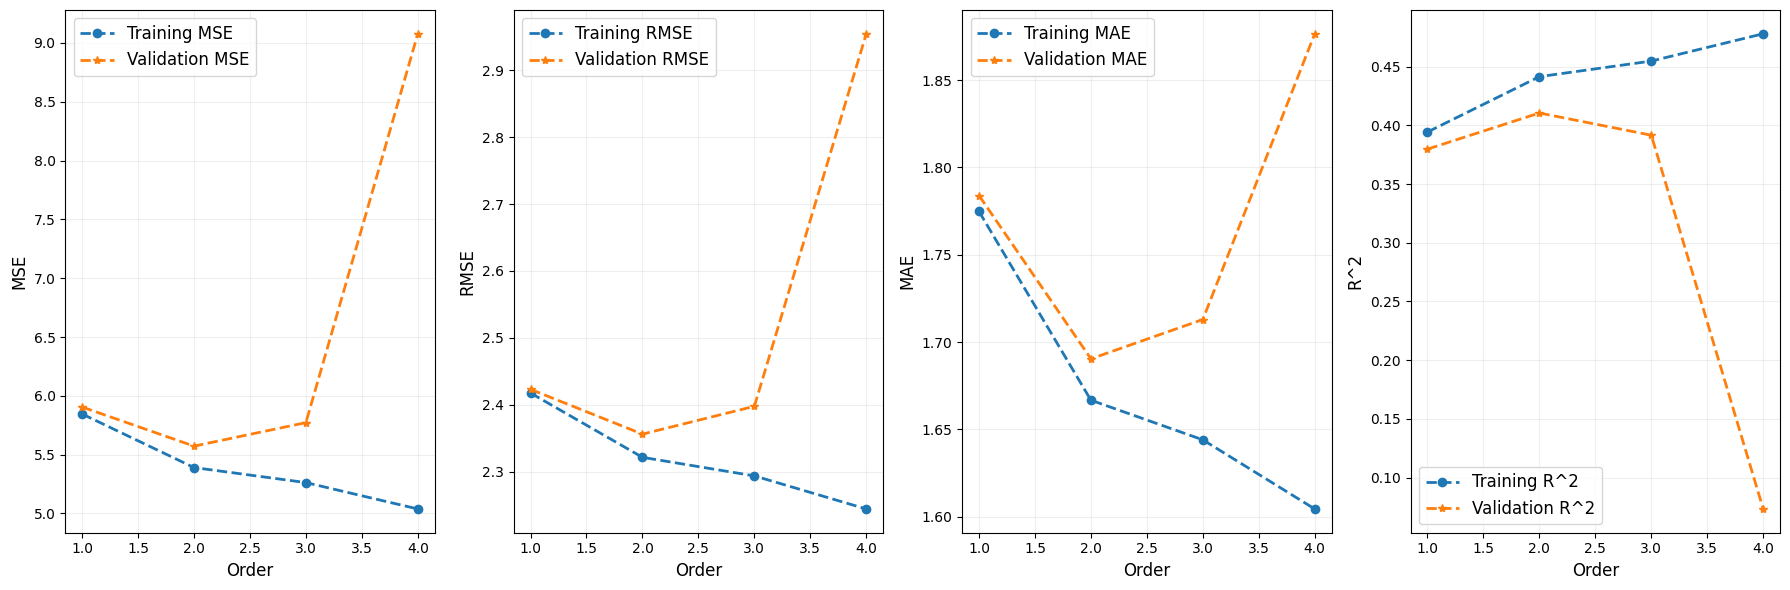

In [ ]:
import matplotlib.pyplot as plt

metrics = [
    ("MSE", MSE_Train, MSE_Test),
    ("RMSE", RMSE_Train, RMSE_Test),
    ("MAE", MAE_Train, MAE_Test),
    ("R^2", R2_Train, R2_Test)
]

fig, axes = plt.subplots(1, len(metrics), figsize=(18, 6))
for idx, (metric_name, data_train, data_test) in enumerate(metrics):
    axe = axes[idx]

    axe.plot(
        orders,
        list(data_train.values()),
        "--o",
        label=f"Training {metric_name}",
        linewidth=2,
    )
    axe.plot(
        orders,
        list(data_test.values()),
        "--*",
        label=f"Validation {metric_name}",
        linewidth=2,
    )
    axe.set_xlabel("Order", fontsize=12)
    axe.set_ylabel(metric_name, fontsize=12)
    axe.grid(alpha=0.2)
    axe.legend(fontsize=12)

plt.tight_layout()
plt.show()

Al analizar las gráficas de Error Cuadrático Medio (MSE) en función del orden del polinomio, se observa claramente que el polinomio de grado 2 produce el MSE más bajo, tanto en el conjunto de entrenamiento como en el de validación. Esto sugiere que el modelo polinomial de grado 2 es el más adecuado para minimizar el error cuadrático medio en nuestras predicciones. Por otro lado, el polinomio de grado 3 muestra el MSE más alto en ambos conjuntos, indicando que es menos efectivo para predecir la edad de los cangrejos con precisión en términos de cuadrados de errores.

Cuando evaluamos el Root Mean Squared Error (RMSE), nuevamente el polinomio de grado 2 demuestra un rendimiento superior al ofrecer el RMSE más bajo en ambas particiones. El polinomio de grado 3, por otro lado, presenta el RMSE más alto, lo que sugiere que este modelo tiende a cometer mayores errores en las predicciones en términos de raíz cuadrada de los errores cuadráticos.

En cuanto al Mean Absolute Error (MAE), notamos que el polinomio de grado 2 exhibe el MAE más bajo en ambos conjuntos, lo que indica una mejor capacidad de predicción en términos de errores absolutos medios. Por el contrario, el polinomio de grado 3 muestra un MAE más alto, lo que sugiere una precisión inferior en comparación con el polinomio de grado 2.

Por último, al evaluar el coeficiente de determinación $R^2$, el polinomio de grado 2 obtiene el R^2 más alto en ambos conjuntos, esto significa que es el que mejor explica la variabilidad en los datos tanto de entrenamiento como de validación.

Con esto, vemos que el modelo generado por el polinomio de grado 2 es el que menos errores generaría en las predicciones, como también podría manejar de mejor forma algunos datos atípicos, siendo de esta manera el modelo evaluado más idóneo para predecir la edad de un cangrejo.

## **3. Validación y entrenamiento final.**

Ahora que hemos seleccionado el modelo de regresión polinomial de grado 2 como el más adecuado para predecir la edad de los cangrejos, procederemos a volver a entrenar este modelo utilizando todo el conjunto de datos. Esto nos permitirá obtener los coeficientes finales del modelo y calcular las métricas de calidad definitivas para evaluar su rendimiento en datos completos. A continuación, presentamos el código para llevar a cabo esta tarea:

In [ ]:
poly = PolynomialFeatures(degree=int(2))
X_train_poly = poly.fit_transform(X_train)

X_test_poly = poly.transform(X_test)

model = LinearRegression().fit(X_train_poly, y_train)

pred_train = model.predict(X_train_poly)
pred_test = model.predict(X_test_poly)

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

mae_train = mean_absolute_error(y_train, pred_train)
mae_test = mean_absolute_error(y_test, pred_test)

print(f"MSE Train = {mse_train}\tMSE Test = {mse_test}")
print(f"RMSE Train = {rmse_train}\tRMSE Test = {rmse_test}")
print(f"MAE Train = {mae_train}\tMAE Test = {mae_test}")
print(f"R^2 Train = {model.score(X_train_poly, y_train)}\tR^2 Test = {model.score(X_test_poly, y_test)}")



MSE Train = 5.391059658369836	MSE Test = 5.497489449378433
RMSE Train = 2.3218655556189804	RMSE Test = 2.3446725676261138
MAE Train = 1.669894250574964	MAE Test = 1.659771741000815
R^2 Train = 0.4304903654836707	R^2 Test = 0.47036067198118203


Basándonos en las métricas obtenidas después de volver a entrenar el modelo de regresión polinomial de grado 2 con todo el conjunto de datos, podemos concluir lo siguiente:

- **MSE (Error Cuadrático Medio)**: El MSE en el conjunto de entrenamiento es de aproximadamente 5.39, y en el conjunto de prueba es de alrededor de 5.50. Estos valores indican que el modelo, en promedio, comete un error cuadrático medio de aproximadamente 5.39 y 5.50 en las predicciones para el conjunto de entrenamiento y prueba, respectivamente. Un MSE más bajo es mejor, y en este caso, los valores son bastante cercanos, lo que sugiere que el modelo generaliza bien en el conjunto de prueba.

- **RMSE (Raíz del Error Cuadrático Medio)**: El RMSE es la raíz cuadrada del MSE y proporciona una medida de la dispersión de los errores. Tanto en el conjunto de entrenamiento como en el de prueba, el RMSE es relativamente bajo, alrededor de 2.32 y 2.34, respectivamente. Esto indica que las predicciones tienden a estar en promedio a unas 2.32 y 2.34 unidades de distancia de la edad real de los cangrejos. Un RMSE bajo es una buena señal.

- **MAE (Error Absoluto Medio)**: El MAE mide el error absoluto promedio de las predicciones. En ambos conjuntos, el MAE es bajo, alrededor de 1.67 en el conjunto de entrenamiento y 1.66 en el de prueba. Esto sugiere que las predicciones tienden a desviarse en promedio en alrededor de 1.67 y 1.66 unidades de edad en comparación con la edad real de los cangrejos. Un MAE bajo también es un indicador positivo.

- **R^2 (Coeficiente de Determinación)**: El coeficiente de determinación mide la proporción de la varianza en la variable objetivo (edad) que se explica por el modelo. En este caso, el modelo tiene un R^2 de aproximadamente 0.43 en el conjunto de entrenamiento y 0.47 en el conjunto de prueba. Esto significa que el modelo es capaz de explicar alrededor del 43% y 47% de la variabilidad en la edad de los cangrejos en los conjuntos de entrenamiento y prueba, respectivamente. Un valor de R^2 cercano a 1 indica un buen ajuste del modelo.

In [ ]:
objects_to_save = {
    "model": model,
    "poly_features": poly
}

pickle_filename = "modelo_y_poly_parte1.pickle"

with open(pickle_filename, "wb") as file:
    pickle.dump(objects_to_save, file)